In [124]:
import requests
import json

OK_200 = 200 ;
url = 'https://sinaica.inecc.gob.mx/index.php';

def get_sinaica_data(url):
    response = requests.get(url, verify=False);
    response.raise_for_status();  # raises exception when not a 2xx response
    raw_string = response.text;
    return raw_string;
    
def get_monitoring_network_data(raw_string):    
    strings = raw_string.split('\n');
    for string in strings:
        data_string = string.strip();
        if data_string.startswith('var cump = {'):
            data_string = data_string.replace('var cump = ','');
            data_string = data_string.replace(';','');   
            monitoring_network_data = json.loads(data_string);
            return monitoring_network_data;
    monitoring_network_data = [];
    return monitoring_network_data;  

def get_monitoring_station_data(stations):
    
    stations_list = []
    for key, value in stations.items():
        stations_list.append({"ID":key, "NAME": stations[key]["nom"],\
                              "CODE": stations[key]["cod"],\
                              "LOC":{ "LAT":stations[key]["lat"], "LONG":stations[key]["long"]}});
    return stations_list;
        
def get_monitoring_stations_data(network):
    
    monitoring_stations_list = [];
    for key, value in network.items():
        stations_list = get_monitoring_station_data(network[key]["ests"])     
        monitoring_stations_list.append({"ID":key, "NAME": network[key]["nom"],\
                                                   "CODE": network[key]["cod"],\
                                                   "STATIONS": stations_list});
    return monitoring_stations_list;
    
def compute_monitoring_network_data_frame(monitoring_network_data): 
    monitoring_network_data_frame = []
    mnd = monitoring_network_data;
    for key, value in monitoring_network_data.items():
        if key != "time" and key != "date":
            monitoring_stations_data = get_monitoring_stations_data(mnd[key]["redes"])  
            monitoring_network_data_frame.append({"ID":key, "NAME":mnd[key]["nom"],\
                                                  "CODE":mnd[key]["cod"],\
                                                  "LOC":{ "LAT":mnd[key]["lat"], "LONG":mnd[key]["long"]},\
                                                  "NETWORK": monitoring_stations_data});
    return monitoring_network_data_frame;
    
def write_data(monitoring_network_data_frame):
    with open('sinaica_monitoring_stations.txt', 'w') as outfile:
        json.dump(monitoring_network_data_frame, outfile)

# SINAICA monitoring stations data - web scraping
raw_string = get_sinaica_data(url);
monitoring_network_data = get_monitoring_network_data(raw_string);
monitoring_network_data_frame =  compute_monitoring_network_data_frame(monitoring_network_data);    
write_data(monitoring_network_data_frame)
#print(monitoring_network_data_frame)

# Print data summary

for monitoring_network in monitoring_network_data_frame:
    print(monitoring_network["NAME"], \
          "(",  monitoring_network["CODE"],  ")", \
          "LAT: ", monitoring_network["LOC"]["LAT"], \
          "LONG: ",monitoring_network["LOC"]["LONG"]);
    for network in monitoring_network["NETWORK"]:
        print("    Red ", network["NAME"], \
              " (",  network["CODE"],  ")")
        for station in network["STATIONS"]:
            print("        Estación",station["ID"], \
              " (",  station["NAME"],  ")", \
              "LAT: ", station["LOC"]["LAT"], \
              "LONG: ",station["LOC"]["LONG"]);           
        
        
  
    












/Users/salvadorruizcorrea/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sinaica.inecc.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Aguascalientes ( AGS ) LAT:  21.88 LONG:  -102.3
    Red  Aguascalientes  ( AGS )
        Estación 31  ( CBTIS  ) LAT:  21.873311111111 LONG:  -102.32080277778
        Estación 32  ( Secretaría de Medio Ambiente ) LAT:  21.84525 LONG:  -102.29125
        Estación 33  ( Centro ) LAT:  21.883780555556 LONG:  -102.295825
        Estación 303  ( Instituto Educativo ) LAT:  21.903277777778 LONG:  -102.27611111111
Baja California - Estatal ( BC1 ) LAT:  32.58 LONG:  -116.16
    Red  Mexicali  ( MXC )
        Estación 39  ( COBACH ) LAT:  32.639722222222 LONG:  -115.50638888889
        Estación 41  ( CESPM ) LAT:  32.603638888889 LONG:  -115.48594444444
        Estación 371  ( UABC ) LAT:  32.646944444444 LONG:  -115.44611111111
    Red  Tecate  ( TKT )
        Estación 44  ( Tecate ) LAT:  32.568825 LONG:  -116.62688055556
    Red  Tijuana  ( TIJ )
        Estación 46  ( Laboratorio ) LAT:  32.529461111111 LONG:  -116.92128055556
        Estación 47  ( La Mesa ) LAT:  32.4975 LONG:  -116.976

In [129]:
# An example on how to extract pollution data
import requests
import json

url = 'https://sinaica.inecc.gob.mx/pags/datGrafs.php';
estacionId = '171'
param = 'PM2.5'
fechaIni = '2021-11-11'
rango = '1'
OK_200 = 200 ;

def get_station_data(url):
    response = requests.post(url, data={'estacionId': estacionId, 'param': param, 'fechaIni': fechaIni, 'rango': rango }, verify=False)
    response.raise_for_status();  # raises exception when not a 2xx response
    raw_string = response.text;
    return raw_string;     

def parse_station_data(raw_string):
    strings = raw_string.split('\n');
    for string in strings:
        data_string = string.strip();
        if data_string.startswith('var dat ='):
            data_string = data_string.replace('var dat =',''); 
            data_string = data_string.replace(';','');
            values = json.loads(data_string);
            return values;
    values = [];
    return values;  

def write_data(values):
    with open('values.txt', 'w') as outfile:
        json.dump(values, outfile)

raw_string = get_station_data(url)
values = parse_station_data(raw_string)
write_data(values)

data = []
for value in values:
    data.append(int(value["valor"]))


/Users/salvadorruizcorrea/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sinaica.inecc.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


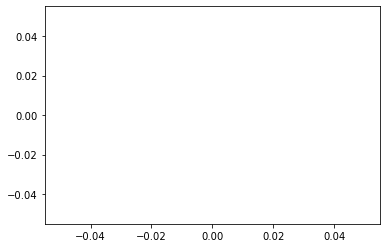

In [130]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

In [123]:
data


[12,
 10,
 14,
 19,
 10,
 13,
 12,
 11,
 22,
 56,
 64,
 52,
 52,
 31,
 16,
 3,
 3,
 4,
 7,
 7,
 8,
 12,
 17,
 14]